# Multi-robot warehouse simulation in Python using A *pathfinding*, where multiple robots move from random start to goal positions on a grid. The simulation detects collisions, identifies congested zones, and visualizes robot movements step by step. It mirrors concepts from Amazon’s DeepFleet, showing how AI predicts and manages robot traffic.

By: **Akhilesh Pant** (MCA)


Step 1:
  Robot 0 → (8, 5)
  Robot 1 → (1, 7)
  Robot 2 → (2, 2)
  Robot 3 → (0, 6)
  Robot 4 → (8, 8)


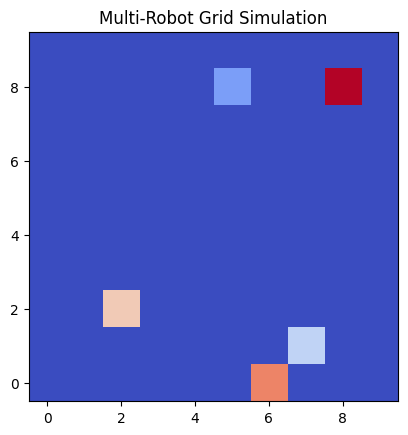


Step 2:
  Robot 0 → (7, 5)
  Robot 1 → (1, 6)
  Robot 2 → (2, 3)
  Robot 3 → (0, 5)
  Robot 4 → (7, 8)


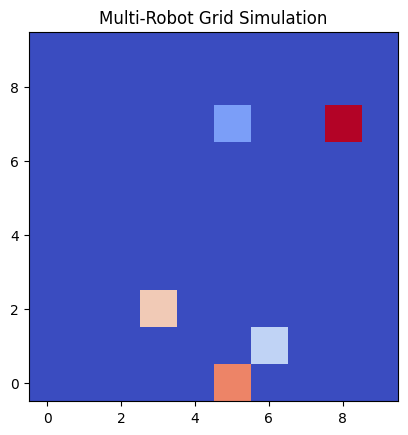


Step 3:
  Robot 0 → (6, 5)
  Robot 1 → (1, 5)
  Robot 2 → (2, 4)
  Robot 3 → (0, 4)
  Robot 4 → (7, 7)


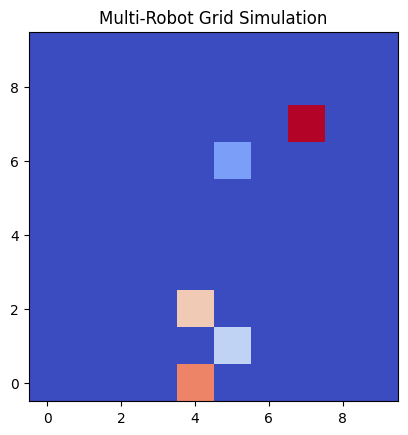


Step 4:
  Robot 0 → (5, 5)
  Robot 1 → (2, 5)
  Robot 2 → (2, 5)
  Robot 3 → (0, 3)
  Robot 4 → (7, 7)
  Collisions detected: [(1, 2)]


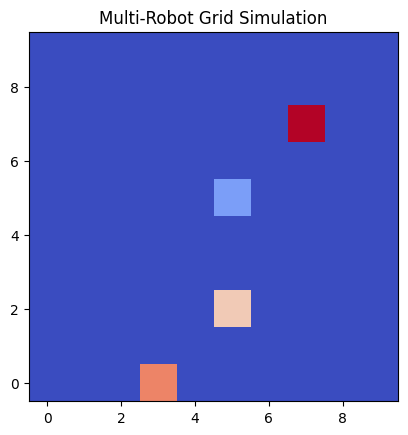


Step 5:
  Robot 0 → (4, 5)
  Robot 1 → (3, 5)
  Robot 2 → (2, 6)
  Robot 3 → (0, 2)
  Robot 4 → (7, 7)


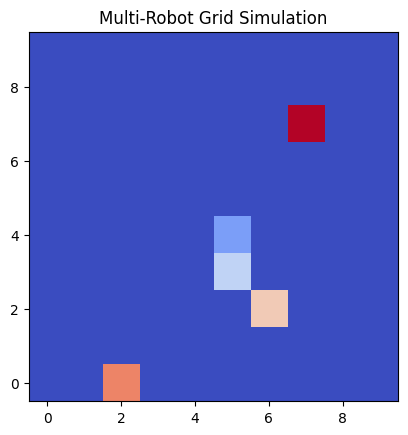


Step 6:
  Robot 0 → (3, 5)
  Robot 1 → (3, 5)
  Robot 2 → (3, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)
  Collisions detected: [(0, 1)]


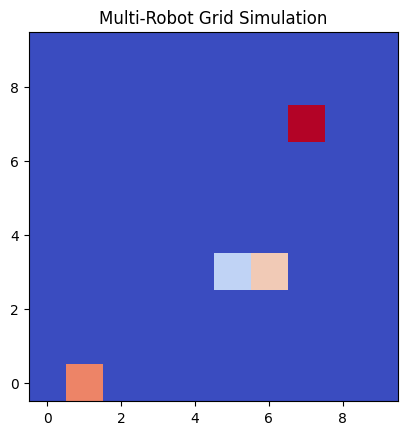


Step 7:
  Robot 0 → (2, 5)
  Robot 1 → (3, 5)
  Robot 2 → (4, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)


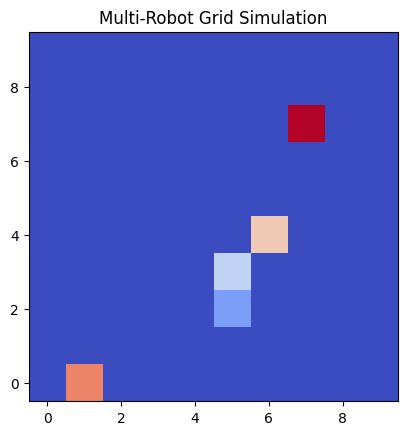


Step 8:
  Robot 0 → (1, 5)
  Robot 1 → (3, 5)
  Robot 2 → (5, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)


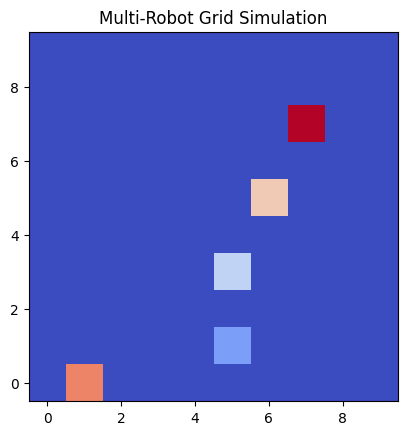


Step 9:
  Robot 0 → (0, 5)
  Robot 1 → (3, 5)
  Robot 2 → (6, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)


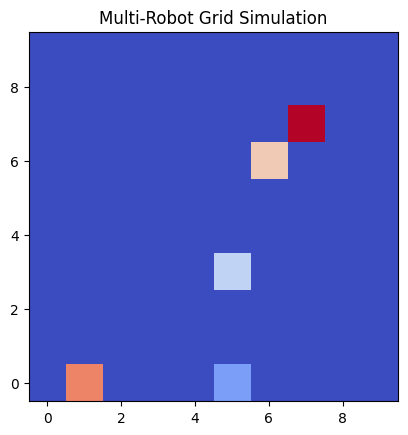


Step 10:
  Robot 0 → (0, 4)
  Robot 1 → (3, 5)
  Robot 2 → (7, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)


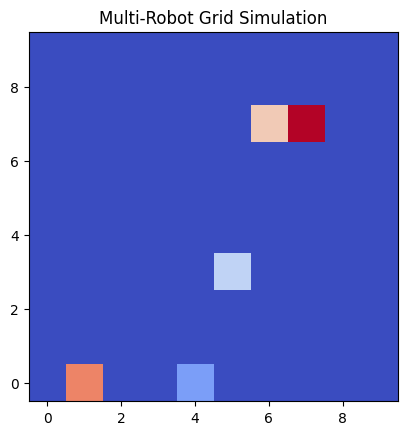


Step 11:
  Robot 0 → (0, 3)
  Robot 1 → (3, 5)
  Robot 2 → (8, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)


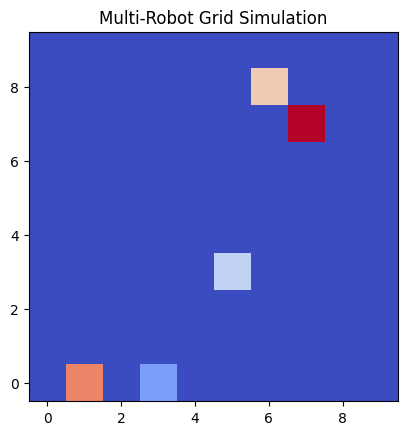


Step 12:
  Robot 0 → (0, 2)
  Robot 1 → (3, 5)
  Robot 2 → (9, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)


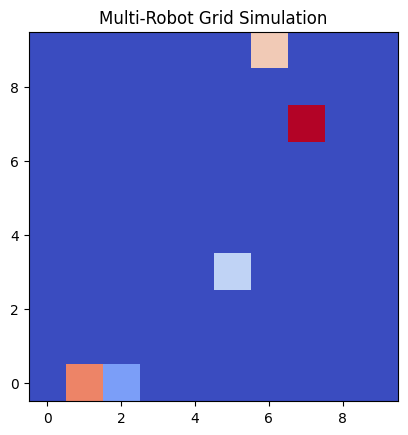


Step 13:
  Robot 0 → (0, 1)
  Robot 1 → (3, 5)
  Robot 2 → (9, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)
  Collisions detected: [(0, 3)]


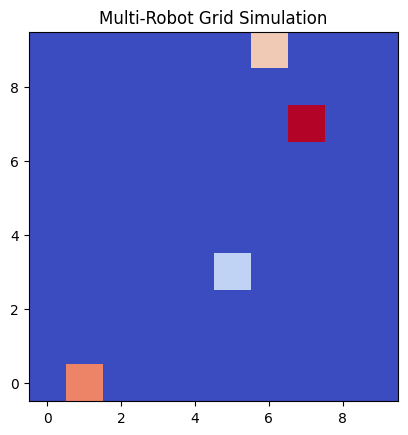


Step 14:
  Robot 0 → (0, 1)
  Robot 1 → (3, 5)
  Robot 2 → (9, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)
  Collisions detected: [(0, 3)]


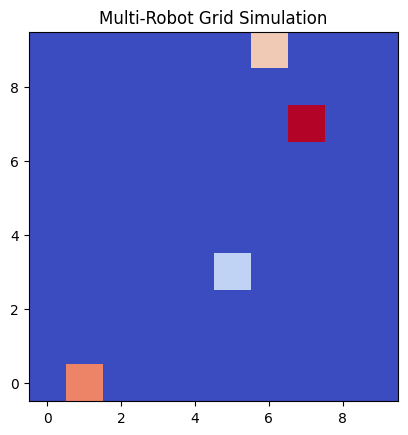


Step 15:
  Robot 0 → (0, 1)
  Robot 1 → (3, 5)
  Robot 2 → (9, 6)
  Robot 3 → (0, 1)
  Robot 4 → (7, 7)
  Collisions detected: [(0, 3)]


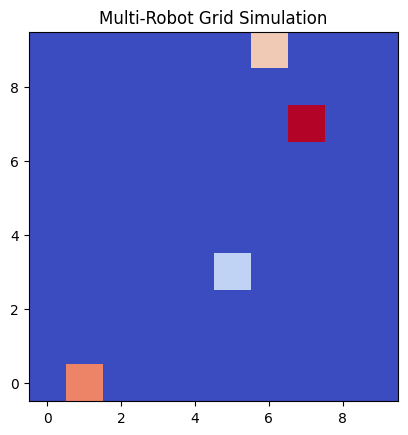

<Figure size 640x480 with 0 Axes>

In [2]:
import heapq
import random
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# A* Pathfinding Implementation
# -----------------------------
def astar(start, goal, grid_size, obstacles=set()):
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        x, y = current
        for dx, dy in [(1,0), (-1,0), (0,1), (0,-1)]:
            neighbor = (x+dx, y+dy)
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
                tentative_g = g_score[current] + 1
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # No path found


# -----------------------------
# Robot Class
# -----------------------------
class Robot:
    def __init__(self, robot_id, start, goal, grid_size, obstacles):
        self.id = robot_id
        self.start = start
        self.goal = goal
        self.path = astar(start, goal, grid_size, obstacles)
        self.position_index = 0

    def move(self):
        if self.path and self.position_index < len(self.path) - 1:
            self.position_index += 1
        return self.path[self.position_index]


# -----------------------------
# Multi-Robot Simulation
# -----------------------------
class MultiRobotSimulation:
    def __init__(self, grid_size, num_robots):
        self.grid_size = grid_size
        self.robots = []
        self.obstacles = set()

        # Generate robots with random start and goal positions
        for i in range(num_robots):
            start = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))
            goal = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))
            robot = Robot(i, start, goal, grid_size, self.obstacles)
            self.robots.append(robot)

    def detect_collisions(self, positions):
        seen = {}
        collisions = []
        for rid, pos in positions.items():
            if pos in seen:
                collisions.append((seen[pos], rid))
            else:
                seen[pos] = rid
        return collisions

    def congestion_zones(self, positions, window=2):
        heatmap = np.zeros((self.grid_size, self.grid_size))
        for pos in positions.values():
            x, y = pos
            heatmap[x, y] += 1
        congestion = np.argwhere(heatmap > window)
        return congestion

    def run(self, steps=20):
        for step in range(steps):
            positions = {}
            for robot in self.robots:
                pos = robot.move()
                positions[robot.id] = pos

            collisions = self.detect_collisions(positions)
            congested = self.congestion_zones(positions)

            print(f"\nStep {step+1}:")
            for rid, pos in positions.items():
                print(f"  Robot {rid} → {pos}")
            if collisions:
                print("  Collisions detected:", collisions)
            if len(congested) > 0:
                print("  Congestion zones:", [tuple(c) for c in congested])

            self.visualize(positions, congested)

    def visualize(self, positions, congested):
        grid = np.zeros((self.grid_size, self.grid_size))
        for rid, pos in positions.items():
            grid[pos[0], pos[1]] = rid + 1  # mark robot ID
        for cx, cy in congested:
            grid[cx, cy] = -1  # congestion mark

        plt.imshow(grid, cmap="coolwarm", origin="lower")
        plt.title("Multi-Robot Grid Simulation")
        plt.pause(0.5)
        plt.clf()


# -----------------------------
# Run Simulation
# -----------------------------
if __name__ == "__main__":
    sim = MultiRobotSimulation(grid_size=10, num_robots=5)
    plt.figure()
    sim.run(steps=15)
    plt.show()



---

## **1. Purpose of the Code**

The code simulates **multiple robots moving in a warehouse grid**, using **A* pathfinding*\* to reach their goals while detecting **collisions** and **congestion zones**. It also **visualizes** robot movements step by step.

---

## **2. Key Components**

### **A. A* Pathfinding Function*\*

* Calculates the **shortest path** from a robot’s start position to its goal.
* Avoids obstacles (none currently in your simulation).
* Returns a **list of positions** representing the robot’s path.

---

### **B. Robot Class**

* Each robot has:

  * **ID** → unique number.
  * **Start & Goal** → starting and ending positions on the grid.
  * **Path** → planned route using A\*.
  * **Position index** → tracks current step in the path.
* **move() method** → moves robot **one step along its path** each time it is called.

---

### **C. MultiRobotSimulation Class**

* **Initializes the warehouse grid** and creates multiple robots with random start/goal positions.
* **detect\_collisions()** → checks if two robots occupy the same cell at the same time.
* **congestion\_zones()** → identifies grid cells with more than a certain number of robots (default >2) and marks them as congested.
* **run() method** → the main simulation loop:

  1. Move all robots one step.
  2. Check for collisions.
  3. Check for congestion.
  4. Print positions and warnings.
  5. Visualize the grid using `matplotlib`.

---

### **D. Visualization**

* Shows a **heatmap of the warehouse grid** at each step.

  * Robots are marked with their IDs.
  * Congestion zones are marked differently (-1).
* Updates dynamically to animate robot movements.

---

## **3. What Happens in Your Output**

For example:

```
Step 1:
  Robot 0 → (8, 5)
  Robot 1 → (1, 7)
  Robot 2 → (2, 2)
  Robot 3 → (0, 6)
  Robot 4 → (8, 8)

Step 2:
  Robot 0 → (7, 5)
  Robot 1 → (1, 6)
  Robot 2 → (2, 3)
  Robot 3 → (0, 5)
  Robot 4 → (7, 8)
```

* Each robot is moving **one step at a time** toward its goal.
* The grid visualization shows these positions as a **moving heatmap**.
* Collisions or congestion will be printed if they happen.

---

## **4. Summary in One Sentence**

This code **simulates multiple robots moving safely on a warehouse grid**, calculates their paths, detects collisions and congestions, and visualizes the movement step by step.

---
## **Simulation Flow of Multi-Robot Coordination**
           ┌───────────────────────┐
           │ Start Simulation       │
           │ Initialize Grid        │
           │ Create Robots (Start & │
           │ Goal positions)        │
           └─────────┬─────────────┘
                     │
                     ▼
           ┌───────────────────────┐
           │ For Each Simulation   │
           │ Step (1..N)           │
           └─────────┬─────────────┘
                     │
                     ▼
           ┌───────────────────────┐
           │ Move Robots One Step  │
           │ Along Their Paths     │
           └─────────┬─────────────┘
                     │
                     ▼
           ┌───────────────────────┐
           │ Detect Collisions      │
           │ (Robots in same cell) │
           └─────────┬─────────────┘
                     │
                     ▼
           ┌───────────────────────┐
           │ Detect Congestion      │
           │ (Cells with >2 robots)│
           └─────────┬─────────────┘
                     │
                     ▼
           ┌───────────────────────┐
           │ Print Positions,       │
           │ Collisions, Congestion │
           └─────────┬─────────────┘
                     │
                     ▼
           ┌───────────────────────┐
           │ Visualize Grid (Heatmap│
           │ + Robot IDs + Congestion) │
           └─────────┬─────────────┘
                     │
                     ▼
           ┌───────────────────────┐
           │ Next Simulation Step  │
           └─────────┬─────────────┘
                     │
                     ▼
           ┌───────────────────────┐
           │ End Simulation (All   │
           │ Steps Completed)      │
           └───────────────────────┘



---

## **1. Importing Libraries**

```python
import heapq
import random
import matplotlib.pyplot as plt
import numpy as np
```

* `heapq` → For **priority queues** used in A\* algorithm (chooses the next best cell to move).
* `random` → To assign **random start and goal positions** to robots.
* `matplotlib.pyplot` → To **visualize the grid** and robot movement.
* `numpy` → To **create and manage the heatmap** for congestion detection.

---

## **2. A* Pathfinding Function*\*

```python
def astar(start, goal, grid_size, obstacles=set()):
```

* This function calculates the **shortest path** from `start` → `goal` in a `grid_size x grid_size` grid.
* `obstacles` are cells robots cannot move into (currently empty).

```python
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
```

* `heuristic` estimates the distance between two points.
* Using **Manhattan distance** (works for grid movement).

```python
    open_list = []
    heapq.heappush(open_list, (0, start))
```

* `open_list` stores cells to explore.
* **Priority queue** ensures we always check the cell with **lowest estimated total cost** first.

```python
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
```

* `came_from` → tracks the path we took.
* `g_score` → distance from start to current cell.
* `f_score` → estimated total distance (g + heuristic).

```python
    while open_list:
        _, current = heapq.heappop(open_list)
```

* Keep checking cells from the priority queue until we reach the goal.
* `current` is the cell being explored now.

```python
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
```

* If we reach the goal:

  * Trace back the path using `came_from`.
  * Return the path **from start to goal**.

```python
        x, y = current
        for dx, dy in [(1,0), (-1,0), (0,1), (0,-1)]:
            neighbor = (x+dx, y+dy)
```

* Check all **4 directions** (up, down, left, right) from the current cell.

```python
            if 0 <= neighbor[0] < grid_size and 0 <= neighbor[1] < grid_size and neighbor not in obstacles:
```

* Only consider neighbors **inside the grid** and **not blocked**.

```python
                tentative_g = g_score[current] + 1
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
```

* Calculate tentative cost to neighbor.
* If it’s better than previous cost:

  * Record **path** in `came_from`.
  * Update `g_score` and `f_score`.
  * Add neighbor to the queue for exploration.

```python
    return None  # No path found
```

* If no path exists, return `None`.

---

## **3. Robot Class**

```python
class Robot:
    def __init__(self, robot_id, start, goal, grid_size, obstacles):
        self.id = robot_id
        self.start = start
        self.goal = goal
        self.path = astar(start, goal, grid_size, obstacles)
        self.position_index = 0
```

* Each robot has an **ID, start & goal position, path, and current position index**.
* `self.path` is calculated using A\*.
* `self.position_index` tracks **current step along the path**.

```python
    def move(self):
        if self.path and self.position_index < len(self.path) - 1:
            self.position_index += 1
        return self.path[self.position_index]
```

* `move()` → move **one step along the path**.
* Returns the **current position** of the robot.

---

## **4. MultiRobotSimulation Class**

```python
class MultiRobotSimulation:
    def __init__(self, grid_size, num_robots):
        self.grid_size = grid_size
        self.robots = []
        self.obstacles = set()
```

* Initializes **simulation parameters**: grid size, robots list, and obstacles.

```python
        for i in range(num_robots):
            start = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))
            goal = (random.randint(0, grid_size-1), random.randint(0, grid_size-1))
            robot = Robot(i, start, goal, grid_size, self.obstacles)
            self.robots.append(robot)
```

* Creates `num_robots` robots with **random start and goal positions**.

---

### **Collision Detection**

```python
    def detect_collisions(self, positions):
        seen = {}
        collisions = []
        for rid, pos in positions.items():
            if pos in seen:
                collisions.append((seen[pos], rid))
            else:
                seen[pos] = rid
        return collisions
```

* Checks if **two robots occupy the same cell**.
* Returns list of robot ID pairs that collided.

---

### **Congestion Detection**

```python
    def congestion_zones(self, positions, window=2):
        heatmap = np.zeros((self.grid_size, self.grid_size))
        for pos in positions.values():
            x, y = pos
            heatmap[x, y] += 1
        congestion = np.argwhere(heatmap > window)
        return congestion
```

* Creates a **grid heatmap** counting robots in each cell.
* Cells with more robots than `window` are marked as **congested**.

---

### **Simulation Loop**

```python
    def run(self, steps=20):
        for step in range(steps):
            positions = {}
            for robot in self.robots:
                pos = robot.move()
                positions[robot.id] = pos
```

* For each step, **move all robots** and record their positions.

```python
            collisions = self.detect_collisions(positions)
            congested = self.congestion_zones(positions)
```

* Detect collisions and congestion zones for the step.

```python
            print(f"\nStep {step+1}:")
            for rid, pos in positions.items():
                print(f"  Robot {rid} → {pos}")
            if collisions:
                print("  Collisions detected:", collisions)
            if len(congested) > 0:
                print("  Congestion zones:", [tuple(c) for c in congested])
```

* Print robot positions, any collisions, and congested cells.

```python
            self.visualize(positions, congested)
```

* Visualize the grid with robot positions and congestion.

---

### **Visualization**

```python
    def visualize(self, positions, congested):
        grid = np.zeros((self.grid_size, self.grid_size))
        for rid, pos in positions.items():
            grid[pos[0], pos[1]] = rid + 1  # mark robot ID
        for cx, cy in congested:
            grid[cx, cy] = -1  # congestion mark
```

* Creates a **grid** with robot IDs.
* Marks **congested cells** as -1.

```python
        plt.imshow(grid, cmap="coolwarm", origin="lower")
        plt.title("Multi-Robot Grid Simulation")
        plt.pause(0.5)
        plt.clf()
```

* Shows the **grid as a heatmap** and updates dynamically for animation.

---

## **5. Running the Simulation**

```python
if __name__ == "__main__":
    sim = MultiRobotSimulation(grid_size=10, num_robots=5)
    plt.figure()
    sim.run(steps=15)
    plt.show()
```

* Creates a **10×10 grid** with 5 robots.
* Runs the simulation for **15 steps**.
* Displays the **animated grid movement** in a matplotlib window.

---

### ✅ **Summary in Simple Words**

1. Create a grid and robots.
2. Each robot calculates its **shortest path** to its goal using A\*.
3. Move robots **one step at a time**.
4. Detect **collisions** and **congestion**.
5. Print and **visualize the grid**.
6. Repeat for the given number of steps.

---


**Interview questions with answers** from the **DeepFleet** and **multi-robot simulation code**
---

# **Easy Questions (1–30)**

**1. What is DeepFleet?**

* **Answer:** DeepFleet is Amazon’s AI model suite designed to predict future traffic patterns and optimize movements of large fleets of mobile robots in warehouses.

**2. How many robots has Amazon deployed worldwide?**

* **Answer:** One million robots.

**3. What is the main goal of DeepFleet?**

* **Answer:** To reduce congestion, optimize robot paths, and improve overall operational efficiency by up to 10%.

**4. Which AI concept is DeepFleet based on?**

* **Answer:** Foundation models, similar to large language and vision models.

**5. Name the four architectures in DeepFleet.**

* **Answer:** RC (Robot-Centric), RF (Robot-Floor), IF (Image-Floor), GF (Graph-Floor).

**6. What does the Robot-Centric (RC) model focus on?**

* **Answer:** Predicting actions of individual robots using local neighborhood information.

**7. Which DeepFleet model uses graph neural networks?**

* **Answer:** Graph-Floor (GF) model.

**8. What type of data is used to train DeepFleet?**

* **Answer:** Billions of hours of real-world operational data from robots.

**9. Name one key metric used to evaluate DeepFleet.**

* **Answer:** Dynamic Time Warping (DTW) for trajectory accuracy.

**10. Which model is the smallest in parameters?**

* **Answer:** Graph-Floor (GF) with 13 million parameters.

**11. What does congestion mean in multi-robot systems?**

* **Answer:** When too many robots occupy the same area, slowing down operations.

**12. What is the main task of robots in Amazon warehouses?**

* **Answer:** Transport inventory shelves to humans and handle packages.

**13. How does the RC model process updates?**

* **Answer:** Asynchronously.

**14. How does RF model differ from RC?**

* **Answer:** RF uses global warehouse information with synchronous decoding.

**15. What is the purpose of the Image-Floor (IF) model?**

* **Answer:** Treat the warehouse as an image and process spatial-temporal features.

**16. Why did IF underperform?**

* **Answer:** Difficulty capturing pixel-level robot interactions at scale.

**17. Which programming language is used in the multi-robot simulation code?**

* **Answer:** Python.

**18. What pathfinding algorithm is used in the code?**

* **Answer:** A\* algorithm.

**19. How does the `Robot` class move robots?**

* **Answer:** Moves one step along the precomputed path at each simulation step.

**20. What library is used for visualization?**

* **Answer:** matplotlib.

**21. How are congestion zones detected in the code?**

* **Answer:** Using a heatmap of robot positions; cells with more robots than a threshold are marked congested.

**22. How does the code detect collisions?**

* **Answer:** By checking if two robots occupy the same cell in the same timestep.

**23. What does the `heapq` library do in the code?**

* **Answer:** Implements a priority queue for selecting the best cell in A\* pathfinding.

**24. What does the `g_score` represent in A*?*\*

* **Answer:** Cost from the start node to the current node.

**25. What does the `f_score` represent in A*?*\*

* **Answer:** Estimated total cost (g\_score + heuristic).

**26. How is the heuristic calculated?**

* **Answer:** Using Manhattan distance (sum of x and y differences).

**27. How is a robot’s path stored?**

* **Answer:** As a list of coordinates from start to goal.

**28. What is visualized in the simulation?**

* **Answer:** Robot positions and congestion zones on a grid.

**29. What happens if no path exists for a robot?**

* **Answer:** The A\* function returns `None`.

**30. What does the `position_index` track in a robot?**

* **Answer:** The robot’s current step along its path.

---

# **Moderate Questions (31–70)**

**31. Why is foundation model approach useful in robotics?**

* **Answer:** It can learn general patterns from large datasets and adapt to new warehouse layouts and scenarios.

**32. What are “emergent behaviors” in multi-robot systems?**

* **Answer:** Patterns like congestion waves that arise from interactions among multiple robots.

**33. What is cross-attention in RF model?**

* **Answer:** It allows robots to consider both local interactions and global floor context simultaneously.

**34. What is CDE in evaluation metrics?**

* **Answer:** Congestion Delay Error – measures operational delays caused by congestion.

**35. Which DeepFleet model achieved lowest errors in position predictions?**

* **Answer:** RC model.

**36. How is the warehouse represented in GF model?**

* **Answer:** As a spatiotemporal graph with nodes and edges.

**37. Why does GF model use fewer parameters yet remain competitive?**

* **Answer:** Efficient representation of global relationships with graph neural networks.

**38. How can simulation code be extended to reroute robots?**

* **Answer:** By recalculating A\* path when collision or congestion is detected.

**39. What is the difference between synchronous and asynchronous updates?**

* **Answer:** Synchronous – all robots update at same timestep; Asynchronous – robots update individually.

**40. Why is heatmap used in congestion detection?**

* **Answer:** It counts the number of robots per cell to identify crowded zones.

**41. How does dynamic time warping (DTW) help evaluate trajectories?**

* **Answer:** Measures similarity between predicted and actual robot paths over time.

**42. In code, what does `np.argwhere(heatmap > window)` do?**

* **Answer:** Returns the coordinates of cells exceeding congestion threshold.

**43. How are random start and goal positions generated?**

* **Answer:** Using `random.randint(0, grid_size-1)` for x and y coordinates.

**44. What happens when two robots try to occupy the same cell?**

* **Answer:** A collision is detected and printed; rerouting not yet implemented.

**45. How can the simulation be used to study congestion patterns?**

* **Answer:** By running multiple steps and checking heatmap outputs at each step.

**46. Why use matplotlib `plt.pause(0.5)` in visualization?**

* **Answer:** To animate the simulation with a small delay between frames.

**47. How can the code be scaled for more robots?**

* **Answer:** Increase `num_robots` and grid size; may require optimization for performance.

**48. What type of environment does the simulation represent?**

* **Answer:** A warehouse-like grid environment.

**49. What Python data structure is used for robot positions?**

* **Answer:** Dictionary `{robot_id: (x, y)}`.

**50. What is the advantage of using A* over random movement?*\*

* **Answer:** A\* guarantees the shortest path considering obstacles.

**51. Why is `came_from` used in A*?*\*

* **Answer:** To reconstruct the shortest path after reaching the goal.

**52. How would you detect deadlocks in the simulation?**

* **Answer:** By checking if robots are repeatedly blocked and cannot progress.

**53. How is the grid initialized in visualization?**

* **Answer:** Using `np.zeros((grid_size, grid_size))`.

**54. How does the code mark congestion visually?**

* **Answer:** Sets grid cell value to `-1` in the heatmap.

**55. What does `grid[pos[0], pos[1]] = rid + 1` do?**

* **Answer:** Marks each robot’s position in the grid with its ID.

**56. What is a priority queue used for in A*?*\*

* **Answer:** Always pick the cell with **lowest f\_score** for exploration.

**57. Why is `f_score` important in A*?*\*

* **Answer:** It balances cost so far (g\_score) and estimated distance (heuristic) to find optimal paths.

**58. How does random start/goal affect simulation behavior?**

* **Answer:** Each run produces different robot paths and possible collisions/congestion.

**59. How can this simulation help understand DeepFleet’s behavior?**

* **Answer:** It models robot movement, congestion, and pathfinding similar to real-world warehouse fleets.

**60. Why is Python suitable for this simulation?**

* **Answer:** Easy syntax, strong libraries for visualization (matplotlib) and computation (numpy).

**61. What is the default congestion window in the code?**

* **Answer:** 2 robots per cell.

**62. How is robot movement stored in `Robot` class?**

* **Answer:** Using a **list of coordinates** in `self.path`.

**63. What does `plt.clf()` do in visualization?**

* **Answer:** Clears the previous figure to update for the next step.

**64. How can the simulation measure efficiency?**

* **Answer:** By analyzing steps taken, collisions, and congested cells.

**65. Why is Manhattan distance used as heuristic?**

* **Answer:** Because robots can only move in four directions (no diagonal).

**66. What is the time complexity of A* in worst case?*\*

* **Answer:** O(b^d), where b = branching factor, d = depth of path.

**67. How does `position_index` prevent a robot from overshooting its path?**

* **Answer:** It stops incrementing when robot reaches the goal.

**68. Why might the RC model outperform GF on position prediction?**

* **Answer:** RC focuses on local neighborhoods, giving more accurate short-term predictions.

**69. What is the importance of asynchronous updates?**

* **Answer:** Reflects real-world conditions where robots move at different times.

**70. How can you improve collision handling in the code?**

* **Answer:** Implement **dynamic rerouting** or **wait-for-cell strategies**.

---

# **Hard Questions (71–100)**

**71. Explain how DeepFleet generalizes across warehouses.**

* **Answer:** By learning patterns from millions of robot-hours across different layouts, fleet sizes, and robot generations.

**72. How does the RF model integrate local and global features?**

* **Answer:** Using cross-attention to consider robot neighbors and warehouse-wide information.

**73. How can you optimize simulation for 100+ robots?**

* **Answer:** Use **vectorized operations with numpy**, reduce plotting frequency, or parallelize robot updates.

**74. How does congestion prediction help in warehouse operations?**

* **Answer:** Enables proactive rerouting, avoiding delays and bottlenecks.

**75. Compare GF and IF models in terms of parameter efficiency.**

* **Answer:** GF uses 13M parameters with efficient graph representation; IF uses more parameters and struggles with pixel-level interactions.

**76. How would you extend the code for **real-time deadlock prevention**?**

* **Answer:** Detect cyclic dependencies of robot paths and dynamically reroute one or more robots.

**77. How does DTW metric differ from simple Euclidean distance?**

* **Answer:** DTW compares entire trajectories over time,
  
**78. How can you integrate reinforcement learning into this multi-robot simulation?**

* **Answer:** Robots could learn optimal paths or rerouting strategies by receiving rewards for reaching goals efficiently and avoiding collisions.

**79. How can you make the A* algorithm dynamic for moving obstacles?*\*

* **Answer:** Recalculate paths in real-time when obstacles or other robots move into the planned path.

**80. What is the effect of increasing grid size on simulation performance?**

* **Answer:** Larger grids increase computation for A\* and visualization, but reduce collision probability if robot density is constant.

**81. How can you parallelize robot movements in Python?**

* **Answer:** Use `multiprocessing` or `numba` to update robot positions simultaneously.

**82. What are potential limitations of the current simulation?**

* **Answer:** No dynamic rerouting, limited congestion management, small grid, random start/goal may be unrealistic.

**83. How does DeepFleet differ from traditional robot scheduling algorithms?**

* **Answer:** DeepFleet predicts trajectories using AI models rather than only relying on deterministic scheduling or heuristics.

**84. How can you evaluate congestion patterns quantitatively?**

* **Answer:** Count the number of congested cells per step or calculate cumulative congestion over simulation steps.

**85. Explain the trade-off between model size and prediction accuracy in DeepFleet.**

* **Answer:** Larger models can capture more patterns (higher accuracy) but require more compute; smaller models are efficient but may be less precise.

**86. How could you visualize multiple time-steps of congestion in one figure?**

* **Answer:** Use a heatmap with color intensity representing cumulative congestion or create an animation of multiple frames.

**87. How is local vs global context important in robot path prediction?**

* **Answer:** Local context prevents collisions with nearby robots; global context helps avoid bottlenecks across the warehouse.

**88. How could the Python simulation handle hundreds of robots efficiently?**

* **Answer:** Use sparse data structures for positions, limit plotting, and batch A\* computations.

**89. How would you modify the simulation to include variable robot speeds?**

* **Answer:** Add a speed attribute to robots and increment `position_index` according to speed per timestep.

**90. How could you integrate sensor noise into the simulation?**

* **Answer:** Randomly perturb robot positions or perceived obstacle positions to simulate real-world inaccuracies.

**91. How does the GF model scale for billion-parameter versions?**

* **Answer:** It can handle large fleets efficiently due to graph representation, reducing memory and compute compared to image-based approaches.

**92. What improvements could be made to the congestion detection algorithm?**

* **Answer:** Include neighborhood influence, predictive congestion, and thresholds based on robot density over multiple timesteps.

**93. How could you combine the simulation with DeepFleet-style predictive models?**

* **Answer:** Feed current robot positions to an ML model to predict future congestion and optimize paths proactively.

**94. How does asynchronous updating reflect real warehouse operations?**

* **Answer:** Robots in real warehouses move independently and do not always update simultaneously.

**95. What is the benefit of using Manhattan distance in grid-based pathfinding?**

* **Answer:** Accurately reflects grid movement constraints (up, down, left, right) and keeps heuristics admissible for A\*.

**96. How could you implement a priority system for robots in the simulation?**

* **Answer:** Assign priorities; higher priority robots can move first, and lower priority robots wait or reroute to avoid collisions.

**97. How might DeepFleet handle new warehouse layouts without retraining?**

* **Answer:** Foundation models generalize from learned patterns to predict behavior in unseen layouts.

**98. How can reinforcement learning be used for congestion avoidance?**

* **Answer:** Robots receive negative rewards for entering congested zones and positive rewards for efficient movement to goals.

**99. How could the simulation be extended to 3D warehouse environments?**

* **Answer:** Add a z-coordinate for levels and update A\* to consider 3D neighbors, obstacles, and gravity constraints.

**100. Explain one real-world application of DeepFleet outside Amazon.**

* **Answer:** Coordinating fleets of delivery drones, autonomous forklifts, or mobile robots in hospitals and factories to reduce collisions and optimize traffic.

---

✅ Now we have **All 100 interview questions** covering:

* Easy (1–30) – basic comprehension
* Moderate (31–70) – technical understanding of AI, pathfinding, and code
* Hard (71–100) – advanced reasoning, extension, optimization, and real-world applications

---

